<a href="https://colab.research.google.com/github/spros1/TaiwaneseBankruptcyPrediction/blob/main/TaiwaneseBankruptcyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taiwanese Bankruptcy Prediction

## About the dataset :
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

*   Number of Instances : 6819 
*   Number of Features  : 96
*   Output Feature      : Bankrupt?

In [1]:
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [87]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df.shape

(6819, 96)

In [88]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

### Data Investigation

In [89]:
## imports for data cleaning
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [91]:
# ckeck statistics
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [92]:
# search for missing values -- no missing values
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

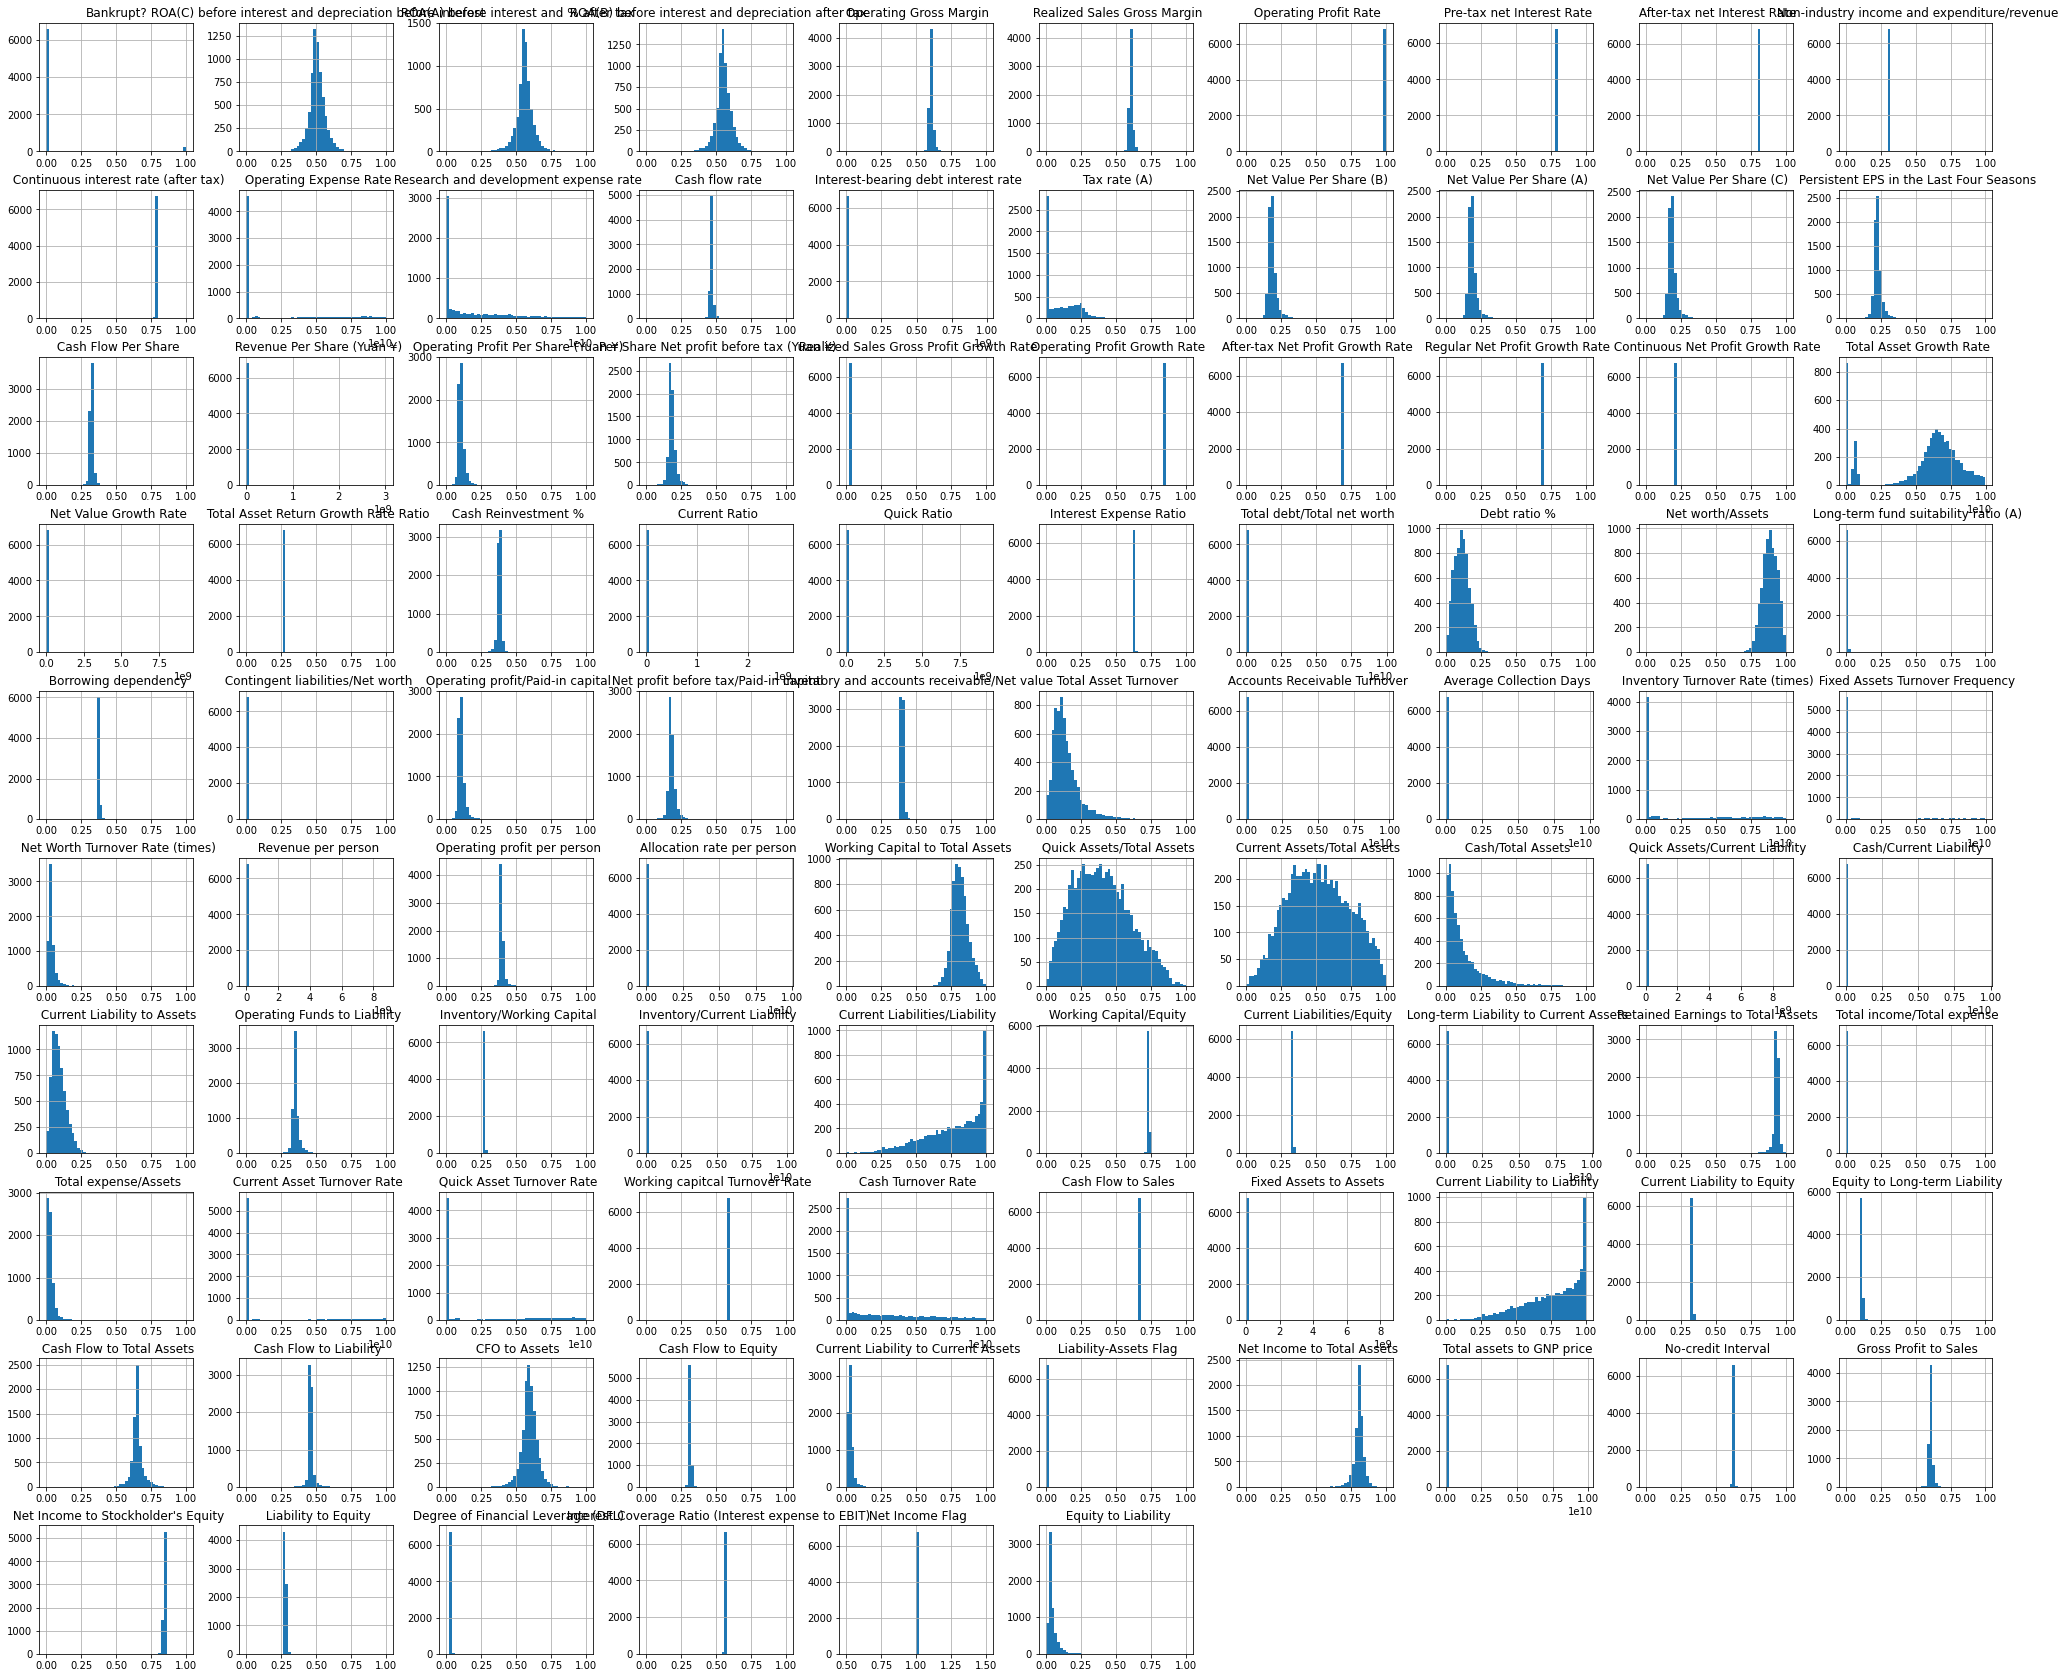

In [93]:
## In order to understand better how all the features are distributed we are going to visualize them using histplot
df.hist(figsize = (35,30), bins = 50)
plt.show()

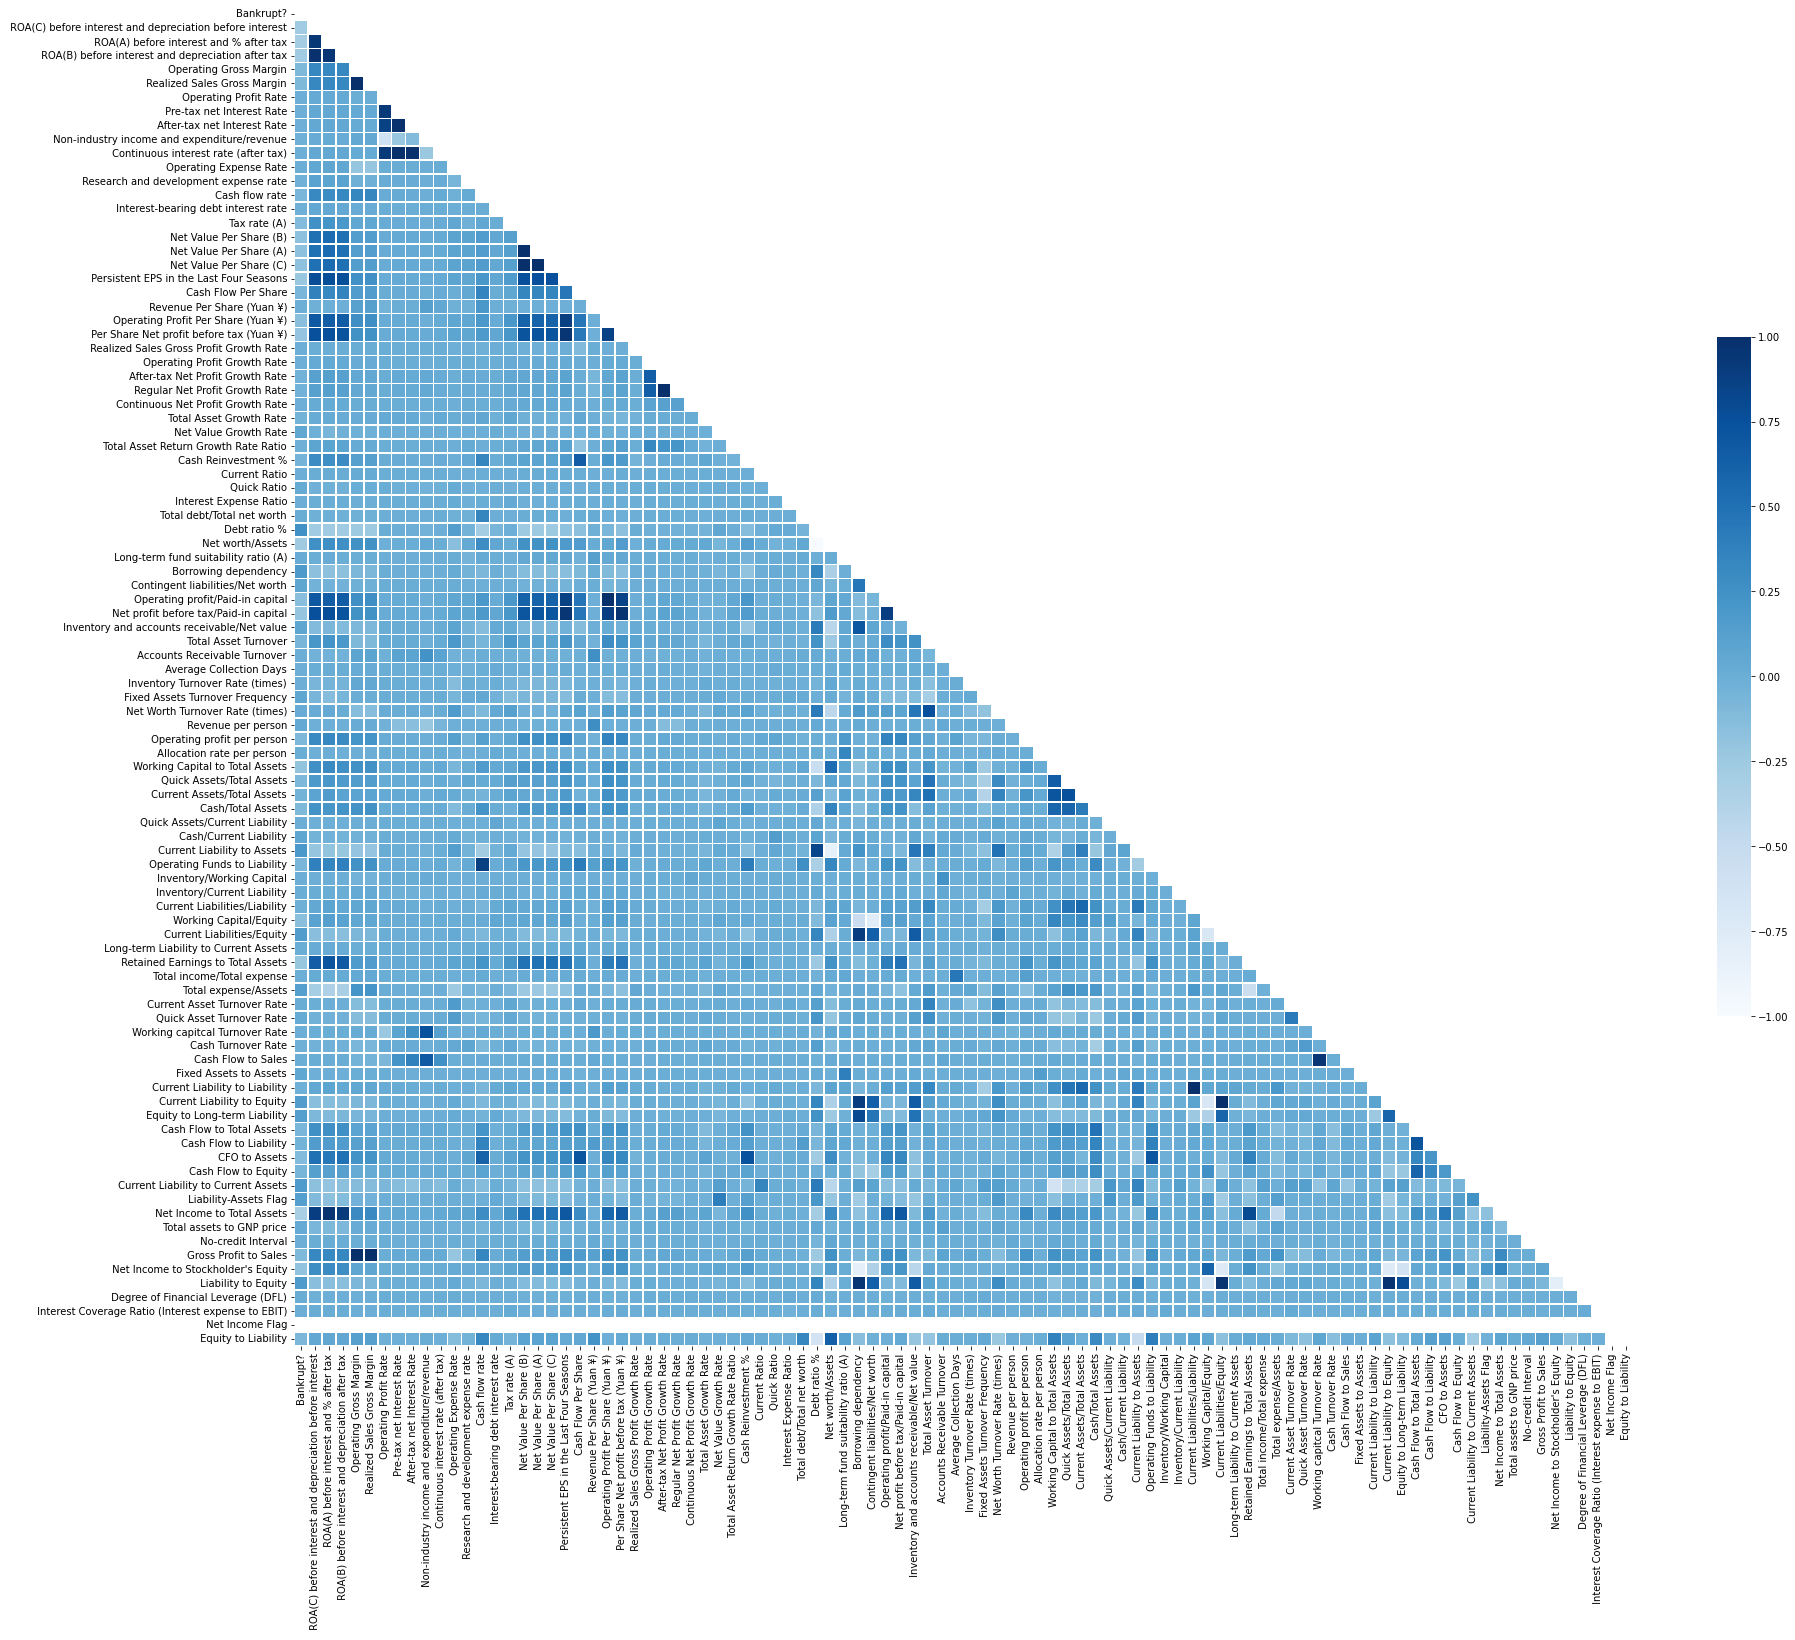

In [94]:
## heatmap
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), cmap="Blues",mask=np.triu(np.ones_like(df.corr(), dtype=bool)) , center=0, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

0    6599
1     220
Name: Bankrupt?, dtype: int64


0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Not Bankrupt'), Text(0, 0, 'Bankrupt')]

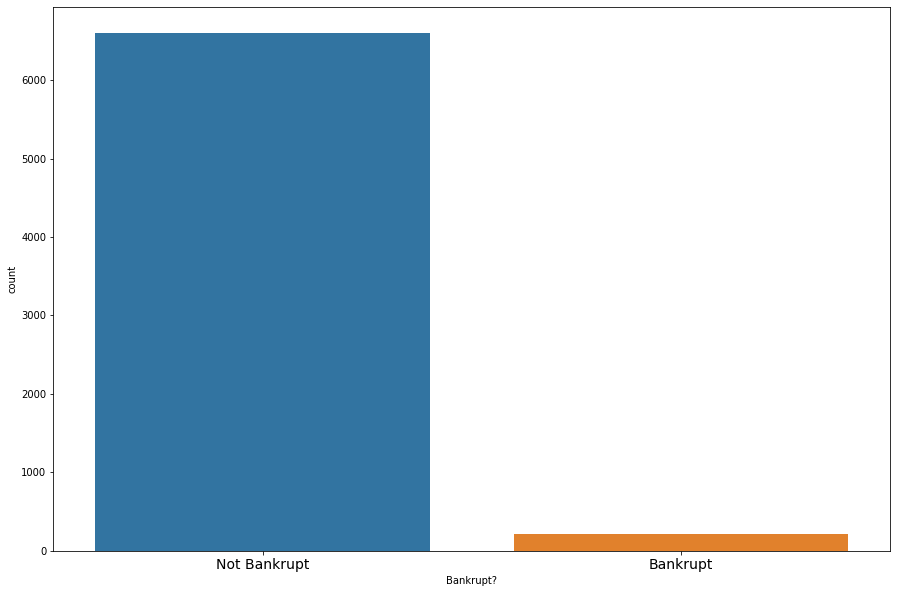

In [95]:
# print count and percentage
print(df['Bankrupt?'].value_counts())
print('\n')
print(df['Bankrupt?'].value_counts(normalize=True))
print('\n')

#plot that also
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(df['Bankrupt?'])
ax.set_xticklabels(['Not Bankrupt', 'Bankrupt'], fontsize=14)

To conclude for the dataset :


*   There are no null values to impute
*   All the values are numeric
*   No duplicate values
*   There exist quite a few outliers in some columns, but for now we are going
 to proceed with the original dataset
*   Values of column 'Net Income Flag' are all equal to 1 so it will be ok to drop it


Also, we found that our data is highly imbalanced(only a few records exists that indicate that a company is bankrup) which needs to be fixed before splitting it into train and test sets or else the model applied would predict every company to not go bankrupt.







## Data Preperation for models


In [96]:
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [97]:
## drop column ' Net Income Flag'
df_wo_net = df.drop(columns=' Net Income Flag')

###Balancing the dataset
As we saw before, the dataset is an imbalanced dataset(97% non-bankrupt). For that reason and in order for our model to 
learn about the minority class which is the bankrupt class, Synthetic Minority Over-sampling technique (SMOTE) is used to balance our model.

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


###Scaled numerical features

In [98]:
## print the fetaures that are categorical
for index, val in df_wo_net.dtypes.iteritems():
    if val == 'int64':
        print(index, val)
        print(df_wo_net[index].value_counts())
        print()

Bankrupt? int64
0    6599
1     220
Name: Bankrupt?, dtype: int64

 Liability-Assets Flag int64
0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64



In [99]:
# scale all the numerical features
scaled_features = df_wo_net
lst = []
for i in df_wo_net.columns:
    if df_wo_net[i].dtypes != 'int64' :
        scaler = StandardScaler()
        scaled = scaler.fit_transform(df_wo_net[i].values.reshape(-1,1))
        scaled_features[i] = scaled
    else:
        pass

scaled_features.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.025697,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.769297,-0.012111,-0.034237,-0.092520,-0.026226,1.750845,-1.750845,-0.133505,...,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,0,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067
1,1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.025697,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.143117,-0.012111,-0.034237,0.372093,-0.026226,1.075727,-1.075727,-0.132282,...,-1.351081,-1.558280,-0.783873,-0.020937,-0.072818,-0.670363,-0.361990,1.169887,-0.095887,-2.192039,-0.328953,-0.123797,-0.094979,-0.143474,-0.026740,-0.135126,-0.423919,1.640522,-0.010126,0.006134,0.004193,-0.012111,-2.192039,-0.123797,0.269947,-0.182201,-0.095129,-0.449376,-0.109511,0.527485,0,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573
2,1,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,-0.616334,-0.740898,-0.523098,-0.151921,-0.829388,-0.381876,-0.380102,0.090822,-1.450153,-0.930172,-0.025697,-0.599601,-1.252562,0.029163,0.0

##Split to train and test 70 - 30 %
Split our target from our predictors and train test split in order to leave a sample of the data for our model to test on at the end. Our dataset is more than 6000 rows so we will keep our test size at 20% and train on 80% of the data.



In [101]:
 x = scaled_features.drop(columns='Bankrupt?')
 y = scaled_features['Bankrupt?']

 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4773, 94), (4773,), (2046, 94), (2046,))

##Create functions for the models, for the visualization and the comparison of results 

In [103]:
# import for models and metrics
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

In [104]:
# function to run method
def run_model (model, model_name):
  
  pipe = Pipeline(steps= [(model_name, model)])
  start = time()
  fitted_model = pipe.fit(X_train, y_train)
  end = time()
  runtime = round((end - start),4)
  print(f"{model_name} took {runtime} seconds or {round((runtime/60),4)} minutes to run.")
  return fitted_model, runtime

In [105]:
# function to fit the model
def prediction (fitted_model, x_feat):
  
  pred = fitted_model.predict(x_feat)
  return pred

In [106]:
# function in order to plot the roc_curve
def eval_classification (y_pred, y_true, x_data, model_name, train_test):

  fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
  print(f''' {model_name} for {train_test} Data FPR {fpr} TPR {tpr}''')

  f, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
  RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax0, name=f'{model_name} {train_test} ROC_Curve')
  PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax1, name=f'{model_name} {train_test} Precision/Recall')
  plt.show()
  return

In [134]:
# function for the scores 
def evaluating_model (y_true, y_pred, model_name, train_test):

  df_score=pd.DataFrame({ 
                   'model_name' : [model_name, model_name, model_name, model_name, model_name],
                   'type'       : [train_test, train_test, train_test, train_test, train_test],
                   'metric_name': ['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
                   'metric'     : [round(accuracy_score(y_true, y_pred) , 4),
                                   round(f1_score(y_true, y_pred)       , 4),
                                   round(recall_score(y_true, y_pred)   , 4),
                                   round(precision_score(y_true, y_pred), 4),
                                   round(roc_auc_score(y_true, y_pred)  ,4)]
  })
  display(df_score)
  return df_score

## Implementation of models

###Logistic Regression

Logistic_Regression took 0.5101 seconds or 0.0085 minutes to run.




,model_name,type,metric_name,metric
0,LG,Train,accuracy,0.9749
1,LG,Train,f1,0.3814
2,LG,Train,recall,0.2606
3,LG,Train,precision,0.7115
4,LG,Train,roc_auc,0.6287




 LG for Train Data FPR [0.         0.00323904 1.        ] TPR [0.         0.26056338 1.        ]


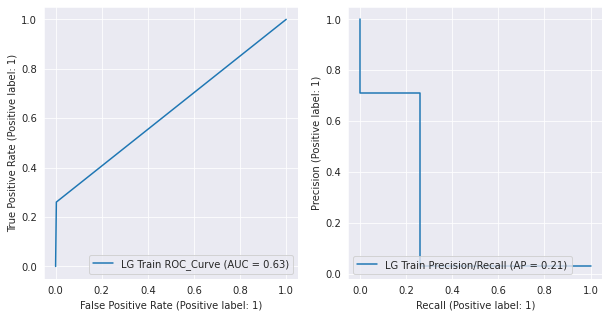

,model_name,type,metric_name,metric
0,LG,Test,accuracy,0.9629
1,LG,Test,f1,0.2549
2,LG,Test,recall,0.1667
3,LG,Test,precision,0.5417
4,LG,Test,roc_auc,0.5805




 LG for Test Data FPR [0.         0.00558943 1.        ] TPR [0.         0.16666667 1.        ]


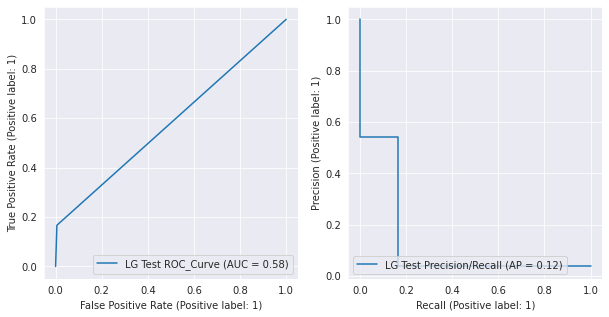

In [135]:
# Logistic Regression run 
lr_model, lr_runtime = run_model(LogisticRegression(max_iter=400), 'Logistic_Regression')
train_pred_lr = prediction(lr_model, X_train)
test_pred_lr = prediction(lr_model, X_test)

# Logistic Regression Evaluation
print("\n")
LG_train = evaluating_model(y_train, train_pred_lr, 'LG', 'Train')
print("\n")
eval_classification(train_pred_lr, y_train, X_train, 'LG', 'Train')

print("\n")
LG_test = evaluating_model(y_test, test_pred_lr, 'LG', 'Test')
print("\n")
eval_classification(test_pred_lr, y_test, X_test, 'LG', 'Test')

###Linear Support Vector Classification

LinearSVC took 23.5764 seconds or 0.3929 minutes to run.




,model_name,type,metric_name,metric
0,LSVC,Train,accuracy,0.9744
1,LSVC,Train,f1,0.2907
2,LSVC,Train,recall,0.1761
3,LSVC,Train,precision,0.8333
4,LSVC,Train,roc_auc,0.5875




 LSVC for Train Data FPR [0.         0.00107968 1.        ] TPR [0.         0.17605634 1.        ]


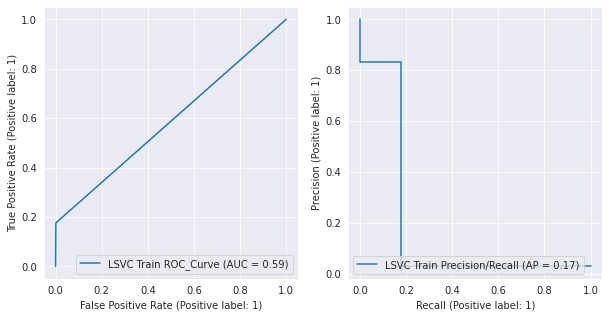

,model_name,type,metric_name,metric
0,LSVC,Test,accuracy,0.9638
1,LSVC,Test,f1,0.2292
2,LSVC,Test,recall,0.1410
3,LSVC,Test,precision,0.6111
4,LSVC,Test,roc_auc,0.5687




 LSVC for Test Data FPR [0.         0.00355691 1.        ] TPR [0.         0.14102564 1.        ]


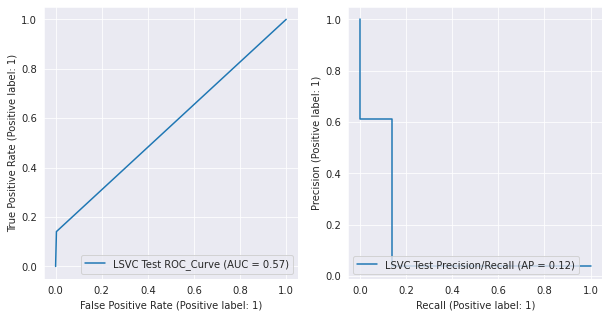

In [136]:
# Linear Support Vector Classification run
LSVC_model, LSVC_runtime = run_model(LinearSVC(max_iter=140000), 'LinearSVC')
train_pred_LSVC = prediction(LSVC_model, X_train)
test_pred_LSVC = prediction(LSVC_model, X_test)

# Linear Support Vector Classification Evaluation
print("\n")
LSVC_train = evaluating_model(y_train, train_pred_LSVC,'LSVC', 'Train')
print("\n")
eval_classification(train_pred_LSVC, y_train, X_train, 'LSVC', 'Train')

print("\n")
LSVC_test = evaluating_model(y_test, test_pred_LSVC, 'LSVC', 'Test')
print("\n")
eval_classification(test_pred_LSVC, y_test, X_test, 'LSVC', 'Test')

###Gaussian Naive Bayes

GaussianNB took 0.0171 seconds or 0.0003 minutes to run.




,model_name,type,metric_name,metric
0,GNB,Train,accuracy,0.2183
1,GNB,Train,f1,0.0689
2,GNB,Train,recall,0.9718
3,GNB,Train,precision,0.0357
4,GNB,Train,roc_auc,0.5835




 GNB for Train Data FPR [0.         0.80479378 1.        ] TPR [0.         0.97183099 1.        ]


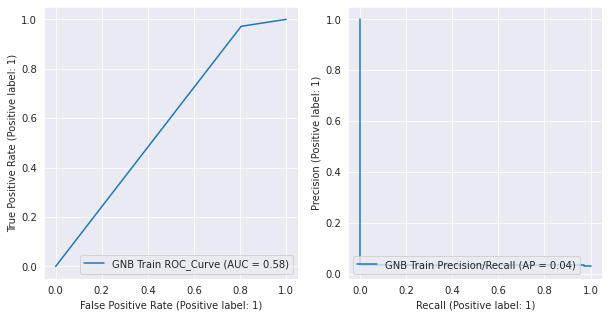

,model_name,type,metric_name,metric
0,GNB,Test,accuracy,0.2170
1,GNB,Test,f1,0.0825
2,GNB,Test,recall,0.9231
3,GNB,Test,precision,0.0432
4,GNB,Test,roc_auc,0.5561




 GNB for Test Data FPR [0.         0.81097561 1.        ] TPR [0.         0.92307692 1.        ]


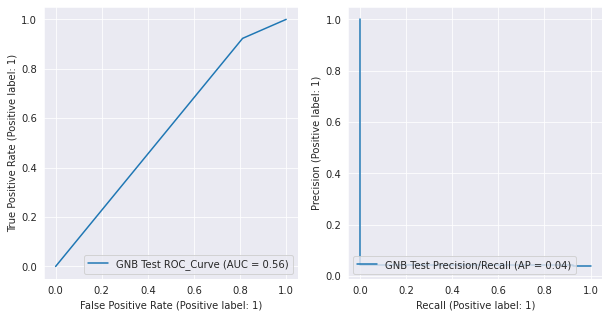

In [137]:
# Gaussian Naive Bayes Evaluation
GNB_model, GNB_runtime = run_model(GaussianNB(), 'GaussianNB')
train_pred_GNB = prediction(GNB_model, X_train)
test_pred_GNB = prediction(GNB_model, X_test)

# Gaussian Naive Bayes Evaluation
print("\n")
GNB_train = evaluating_model(y_train, train_pred_GNB, 'GNB', 'Train')
print("\n")
eval_classification(train_pred_GNB, y_train, X_train,'GNB', 'Train')

print("\n")
GNB_test = evaluating_model(y_test, test_pred_GNB,'GNB', 'Test')
print("\n")
eval_classification(test_pred_GNB, y_test, X_test, 'GNB', 'Test')

###Random Forest

RandomForest took 4.4551 seconds or 0.0743 minutes to run.




,model_name,type,metric_name,metric
0,RFC,Train,accuracy,1.0
1,RFC,Train,f1,1.0
2,RFC,Train,recall,1.0
3,RFC,Train,precision,1.0
4,RFC,Train,roc_auc,1.0




 RFC for Train Data FPR [0. 0. 1.] TPR [0. 1. 1.]


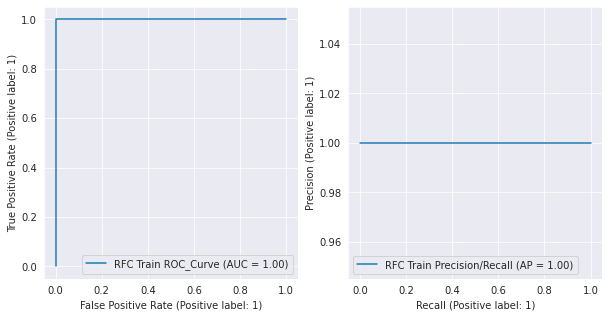

,model_name,type,metric_name,metric
0,RFC,Test,accuracy,0.9648
1,RFC,Test,f1,0.2653
2,RFC,Test,recall,0.1667
3,RFC,Test,precision,0.6500
4,RFC,Test,roc_auc,0.5816




 RFC for Test Data FPR [0.         0.00355691 1.        ] TPR [0.         0.16666667 1.        ]


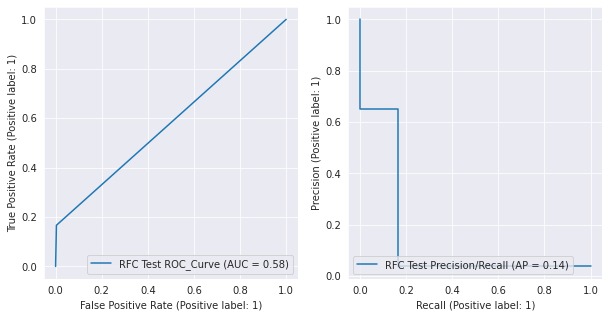

In [140]:
#  Random Forest model run
RFC_model, RFC_runtime = run_model(RandomForestClassifier(), 'RandomForest')
train_pred_RFC = prediction(RFC_model, X_train)
test_pred_RFC = prediction(RFC_model, X_test)

# Random Forest Evaluation
print("\n")
RFC_train = evaluating_model(y_train, train_pred_RFC, 'RFC', 'Train')
print("\n")
eval_classification(train_pred_RFC, y_train, X_train,'RFC', 'Train')

print("\n")
RFC_test = evaluating_model(y_test, test_pred_RFC,'RFC', 'Test')
print("\n")
eval_classification(test_pred_RFC, y_test, X_test, 'RFC', 'Test')

###Gradient Boosted Trees

GradientBoostedTrees took 13.4316 seconds or 0.2239 minutes to run.


,model_name,type,metric_name,metric
0,GBT,Train,accuracy,0.9943
1,GBT,Train,f1,0.8958
2,GBT,Train,recall,0.8169
3,GBT,Train,precision,0.9915
4,GBT,Train,roc_auc,0.9083




 GBT for Train Data FPR [0.00000000e+00 2.15936083e-04 1.00000000e+00] TPR [0.         0.81690141 1.        ]


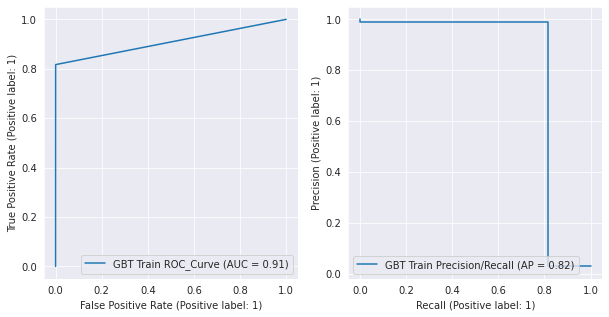

,model_name,type,metric_name,metric
0,GBT,Test,accuracy,0.9633
1,GBT,Test,f1,0.3243
2,GBT,Test,recall,0.2308
3,GBT,Test,precision,0.5455
4,GBT,Test,roc_auc,0.6116




 GBT for Test Data FPR [0.         0.00762195 1.        ] TPR [0.         0.23076923 1.        ]


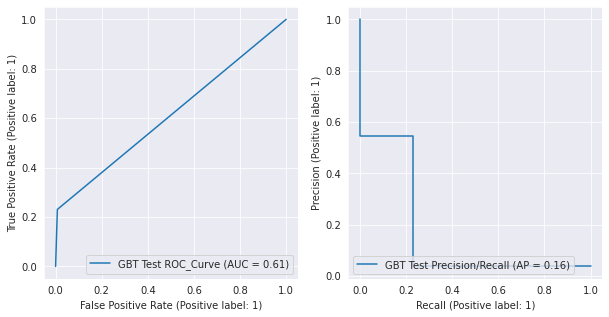

In [141]:
# Gradient Boosted Trees Run
GBT_model, GBT_runtime = run_model(GradientBoostingClassifier(), 'GradientBoostedTrees')
train_pred_GBT = prediction(GBT_model, X_train)
test_pred_GBT = prediction(GBT_model, X_test)

# Gradient Boosted Trees Evaluation
GBT_train = evaluating_model(y_train, train_pred_GBT, 'GBT', 'Train')
print("\n")
eval_classification(train_pred_GBT, y_train, X_train,'GBT', 'Train')

print("\n")
GBT_test = evaluating_model(y_test, test_pred_GBT,'GBT', 'Test')
print("\n")
eval_classification(test_pred_GBT, y_test, X_test, 'GBT', 'Test')

###Extra Tree Classifier

ExtraTreeClassifier took 0.5235 seconds or 0.0087 minutes to run.


,model_name,type,metric_name,metric
0,ETC,Train,accuracy,1.0
1,ETC,Train,f1,1.0
2,ETC,Train,recall,1.0
3,ETC,Train,precision,1.0
4,ETC,Train,roc_auc,1.0




 ETC for Train Data FPR [0. 0. 1.] TPR [0. 1. 1.]


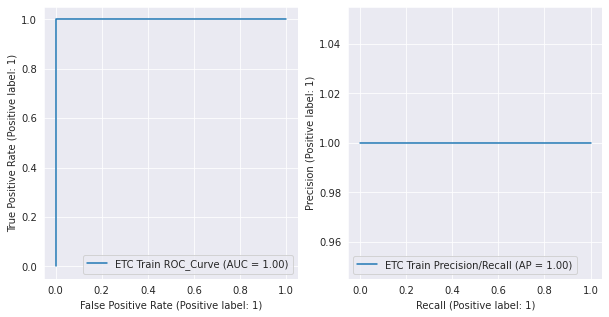

,model_name,type,metric_name,metric
0,ETC,Test,accuracy,0.9653
1,ETC,Test,f1,0.2022
2,ETC,Test,recall,0.1154
3,ETC,Test,precision,0.8182
4,ETC,Test,roc_auc,0.5572




 ETC for Test Data FPR [0.         0.00101626 1.        ] TPR [0.         0.11538462 1.        ]


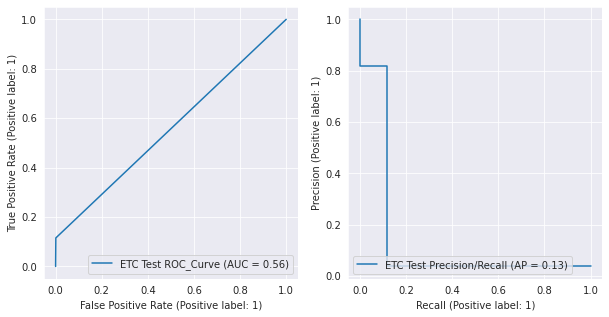

In [142]:
# Extra Tree Classifier Run
ETC_model, ETC_runtime = run_model(ExtraTreesClassifier(), 'ExtraTreeClassifier')
train_pred_ETC = prediction(ETC_model, X_train)
test_pred_ETC = prediction(ETC_model, X_test)

# Extra Tree Classifier evaluation
ETC_train = evaluating_model(y_train, train_pred_ETC, 'ETC', 'Train')
print("\n")
eval_classification(train_pred_ETC, y_train, X_train,'ETC', 'Train')

print("\n")
ETC_test = evaluating_model(y_test, test_pred_ETC,'ETC', 'Test')
print("\n")
eval_classification(test_pred_ETC, y_test, X_test, 'ETC', 'Test')


## Create functions for model comparisons

In [143]:
model_compare = pd.concat([LG_train  , LG_test  , 
                           LSVC_train, LSVC_test,
                           GNB_train , GNB_test ,
                           RFC_train , RFC_test , 
                           GBT_train , GBT_test ,
                           ETC_train , ETC_test
                          ])

In [144]:
# for model comparisons
def model_comparisons (df, metric, axis):

  grouped_df = model_compare[model_compare['metric_name'] == metric]

  sns.set_style("darkgrid")
  g = sns.barplot( data=grouped_df, hue='type', x='model_name', y='metric', palette='dark', ax=axis )
  g.set_ylabel(metric)
  g.set_title(f'{metric} of Models \nfor Company Bankruptcy')
  g.legend(loc=(0.6,1.15))

  return

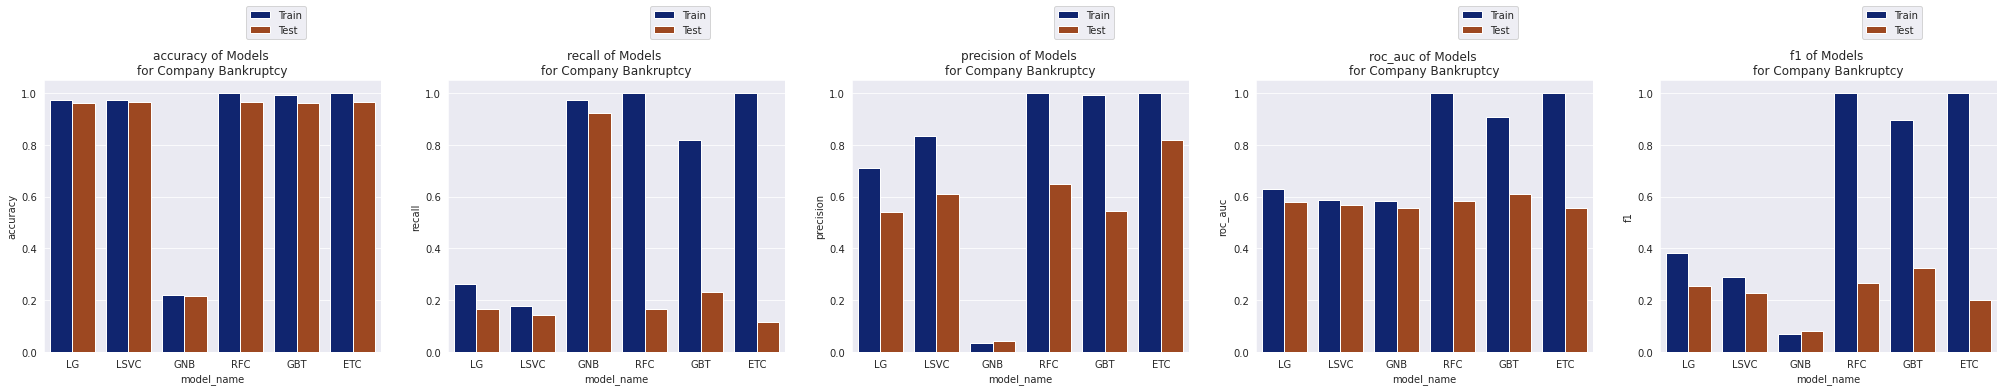

In [154]:
## Plot the scores of every method 
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5, figsize=(35,5))

model_comparisons(model_compare, 'accuracy' , ax0)
model_comparisons(model_compare, 'recall'   , ax1)
model_comparisons(model_compare, 'precision', ax2)
model_comparisons(model_compare, 'roc_auc'  , ax3)
model_comparisons(model_compare, 'f1'       , ax4)
